In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("BIPA_data.csv", index_col = 0)

In [3]:
data = data[data['result'] != 'UNKNOWN']

In [4]:
not_sup = data[data['position'] != 'S']

In [5]:
sup = data[data['position'] == 'S']

In [6]:
top = data[data['position'] == 'T']
jung = data[data['position'] == 'J']
mid = data[data['position'] == 'M']
adc = data[data['position'] == 'A']

In [25]:
wardPlaced = data['wardPlaced'].value_counts()
data.value_counts(['wardPlaced', 'result'])

wardPlaced  result
6           LOSE      49525
            WIN       48392
5           LOSE      47900
7           LOSE      47140
            WIN       46868
                      ...  
81          WIN           1
103         LOSE          1
107         LOSE          1
111         WIN           1
226         LOSE          1
Length: 225, dtype: int64

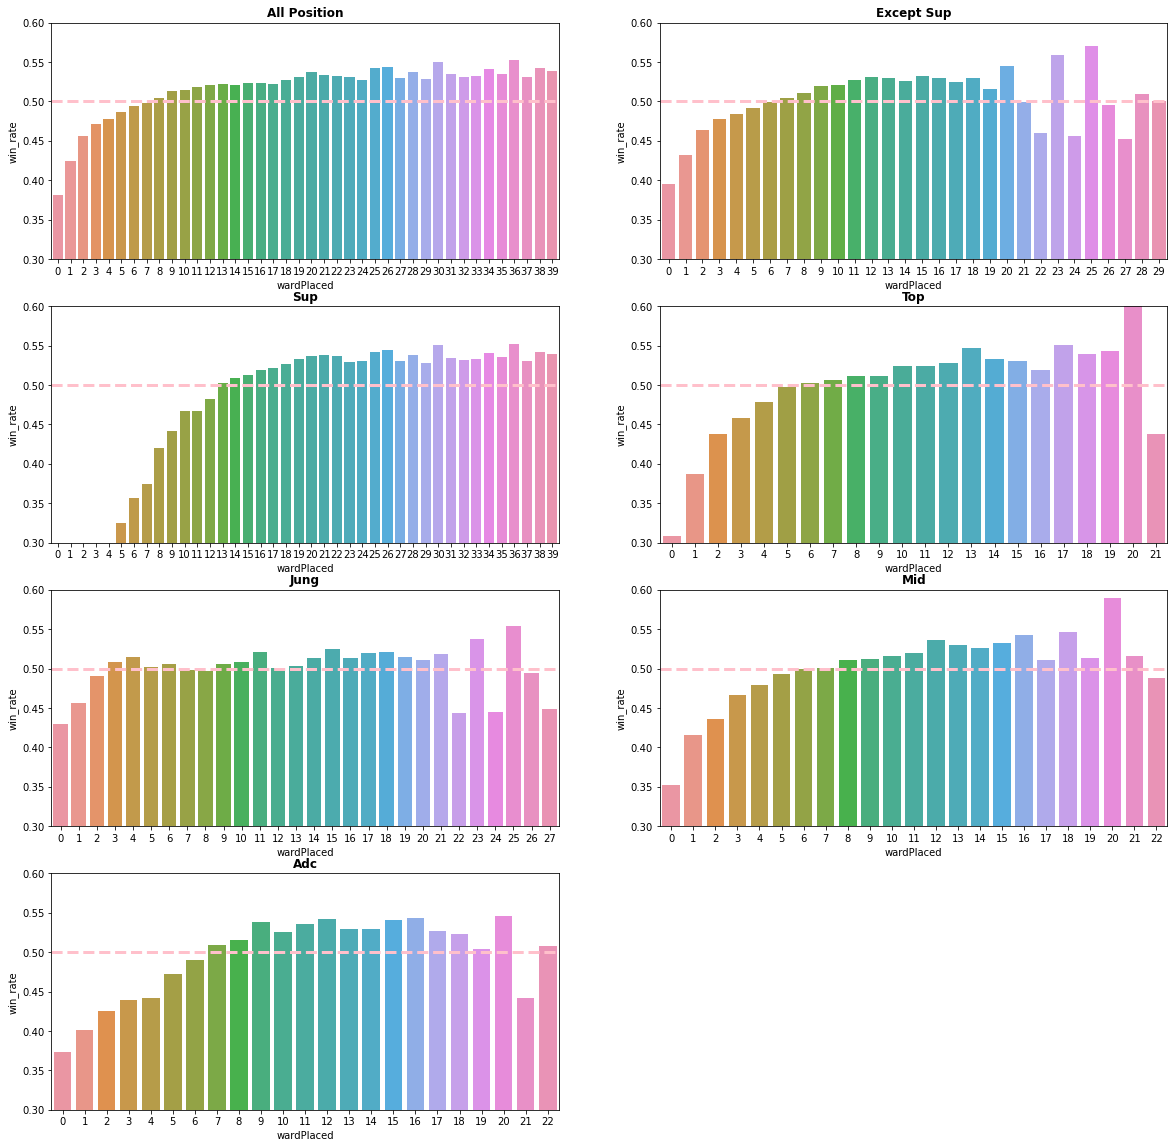

In [7]:
plt.figure(figsize = (20, 20))

for x, y, z in zip([421, 422, 423, 424, 425, 426, 427], [data, not_sup, sup, top, jung, mid, adc], ['All Position', 'Except Sup', 'Sup', 'Top', 'Jung', 'Mid', 'Adc']):
    wardPlaced = y['wardPlaced'].value_counts()
    ward_win = []
    for i in wardPlaced[wardPlaced > 50].index:
        win = y.value_counts(['wardPlaced', 'result'])[i]['WIN']
        lose = y.value_counts(['wardPlaced', 'result'])[i]['LOSE']
        win_rate = win/(win+lose)
        ward_win.append({'wardPlaced' : i, 'win_rate' : win_rate})
    ward_win = pd.DataFrame(ward_win)
    
    plt.subplot(x)
    sns.barplot(data = ward_win[ward_win['wardPlaced']<40], x = 'wardPlaced', y = 'win_rate').set_ylim(0.3,0.6)
    plt.axhline(0.5, ls = '--', lw = 3, color = 'pink')
    plt.title(z, weight = 'bold')